<a href="https://colab.research.google.com/github/2303A51606/ADM_03/blob/main/ADM_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
# Load the dataset
df = pd.read_csv("/content/flipkart_com-ecommerce_sample.csv")


In [4]:
# Display basic info
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1518 entries, 0 to 1517
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1518 non-null   object 
 1   crawl_timestamp          1518 non-null   object 
 2   product_url              1517 non-null   object 
 3   product_name             1517 non-null   object 
 4   product_category_tree    1517 non-null   object 
 5   pid                      1517 non-null   object 
 6   retail_price             1512 non-null   float64
 7   discounted_price         1512 non-null   float64
 8   image                    1517 non-null   object 
 9   is_FK_Advantage_product  1517 non-null   object 
 10  description              1516 non-null   object 
 11  product_rating           1517 non-null   object 
 12  overall_rating           1517 non-null   object 
 13  brand                    936 non-null    object 
 14  product_specifications  

In [5]:
# Clean and preprocess
df = df.dropna(subset=["product_name", "retail_price", "discounted_price", "product_category_tree"])

In [6]:
# Convert price columns to numeric
df['retail_price'] = pd.to_numeric(df['retail_price'], errors='coerce')
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
df = df.dropna(subset=["retail_price", "discounted_price"])

In [10]:
# Convert price columns to numeric
df['retail_price'] = pd.to_numeric(df['retail_price'], errors='coerce')
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
df = df.dropna(subset=["retail_price", "discounted_price"])
print("Number of records after preprocessing:", df.shape[0])

# Extract main category from product_category_tree
df['main_category'] = df['product_category_tree'].str.extract(r'^\["([^"]+)"')

Number of records after preprocessing: 1512


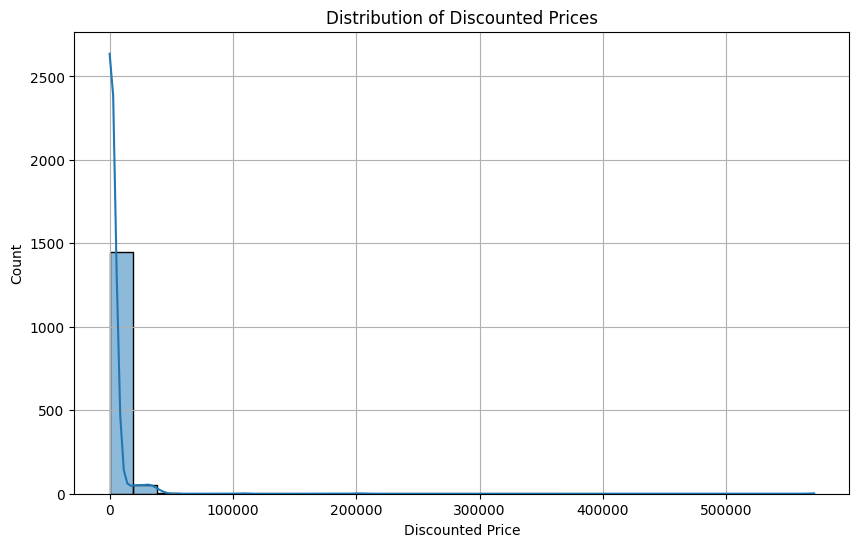

In [11]:
# 1. Price Distribution Plot
plt.figure(figsize=(10,6))
sns.histplot(df['discounted_price'], bins=30, kde=True)
plt.title("Distribution of Discounted Prices")
plt.xlabel("Discounted Price")
plt.ylabel("Count")
plt.grid(True)
plt.show()

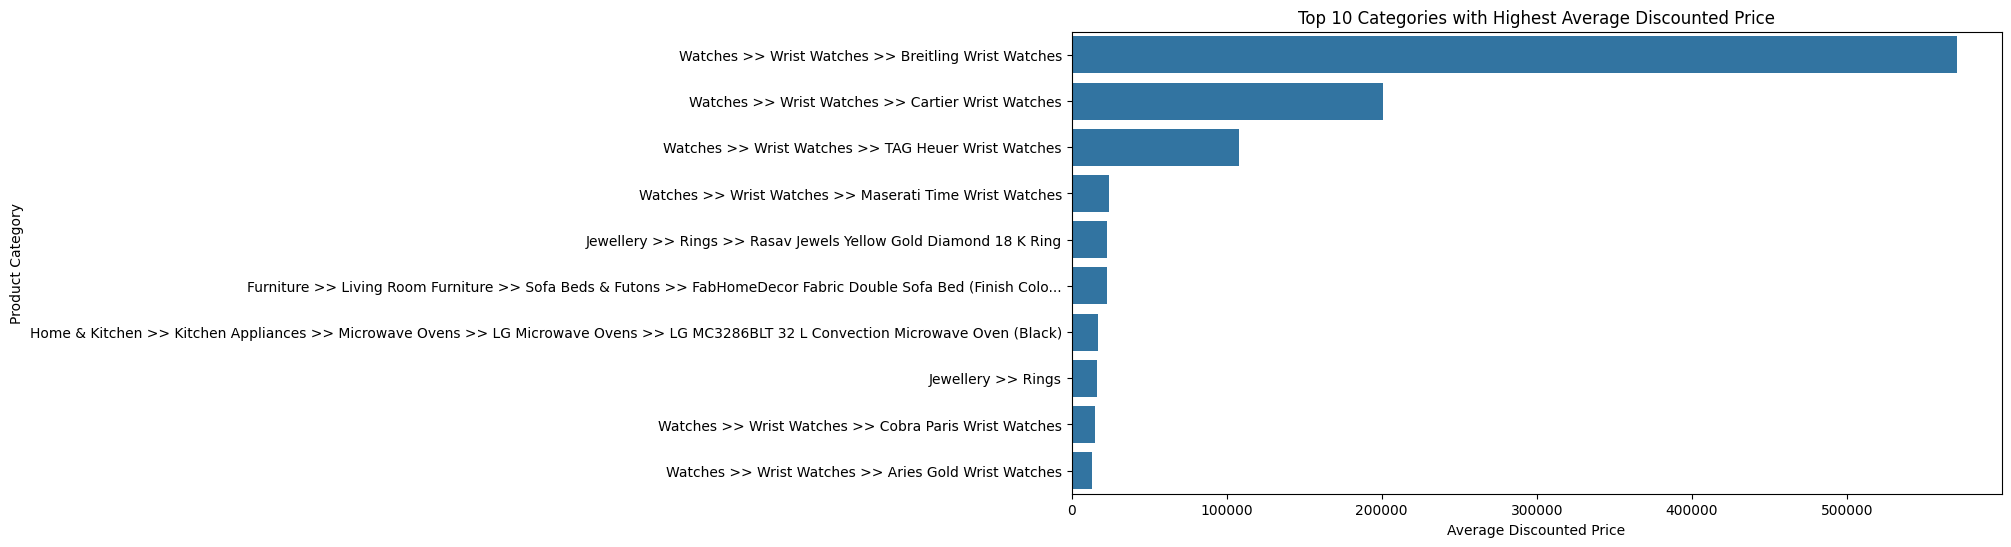

In [12]:
# 2. Category-wise Average Price Bar Plot
avg_price_by_category = df.groupby("main_category")["discounted_price"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=avg_price_by_category.values, y=avg_price_by_category.index)
plt.title("Top 10 Categories with Highest Average Discounted Price")
plt.xlabel("Average Discounted Price")
plt.ylabel("Product Category")
plt.show()

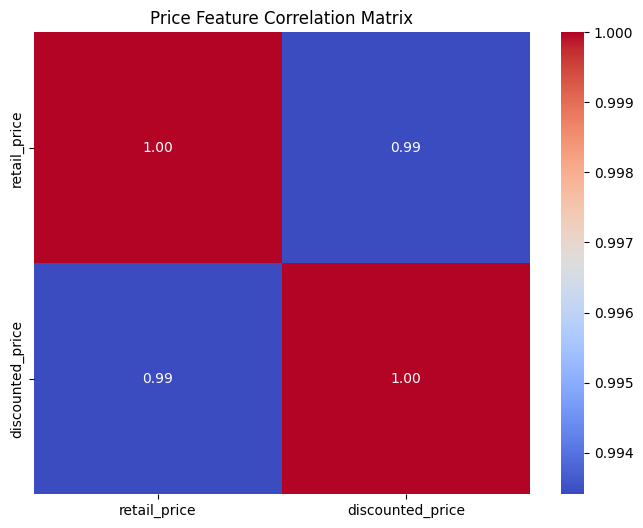

In [13]:
# 3. Correlation Heatmap
df_corr = df[['retail_price', 'discounted_price']]
plt.figure(figsize=(8, 6))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Price Feature Correlation Matrix")
plt.show()

In [14]:
# Building a simple pricing model (optional)
# Predict discounted price from retail price
X = df[['retail_price']]
y = df['discounted_price']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred = model.predict(X_test)
print("Model Coefficient:", model.coef_)
print("Model Intercept:", model.intercept_)
print("MSE:", mean_squared_error(y_test, y_pred))

Model Coefficient: [0.96778921]
Model Intercept: -907.0188986107614
MSE: 3984972.3070994406
